C:\Users\k21pa\AppData\Local\Temp\ipykernel_8852\1041064827.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  band_counts = data.groupby(['p_band', 'best_simulation']).size().reset_index(name='count')


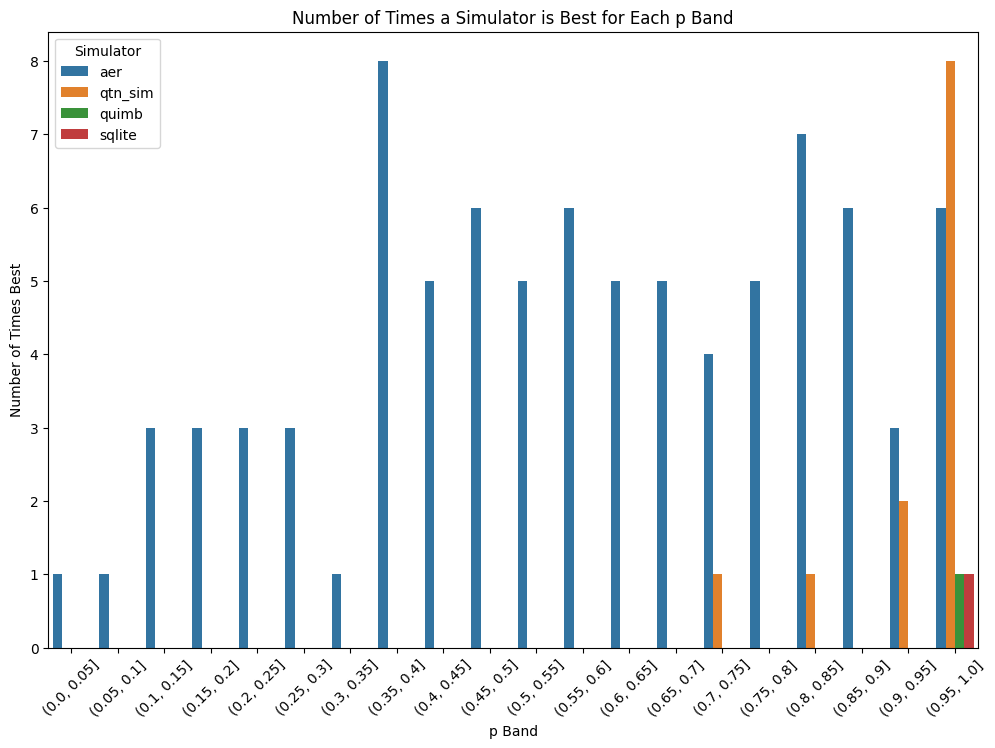

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('simulationData.csv')

# Create bands for the 'p' values
data['p_band'] = pd.cut(data['p'], bins=np.arange(0, 1.05, 0.05))

# Count the number of times each simulator is the best for each band
band_counts = data.groupby(['p_band', 'best_simulation']).size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=band_counts, x='p_band', y='count', hue='best_simulation')
plt.title('Number of Times a Simulator is Best for Each p Band')
plt.xlabel('p Band')
plt.ylabel('Number of Times Best')
plt.xticks(rotation=45)
plt.legend(title='Simulator')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select features and target
X = data[['n', 'p', 'd']]
y = data['best_simulation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.86


In [20]:
# Create a new DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# Save the DataFrame to a CSV file
results.to_csv('predict.csv', index=False)